In [3]:
import lib.csv_helpers as csv
from IPython.display import display
import shutil
import os

#Delete any existing dummy data
if os.path.exists('dummydata'):
    shutil.rmtree('dummydata')

## Generate Dummy Data
for testing / demo purposes.

In [ ]:
import lib.csv_helpers as csv
from IPython.display import display
import lib.json_setup as json_setup

print("Generating metadata run list with the following settings")

# Start with the example setup dictionary
setup = csv.get_default_setup()

run_df = csv.generate_run_df(setup)
display(run_df)
# Iterate through the run_df calling dummy_measurement for each row,
# Stores the results in the path/subdirs defined in setup. 
csv.run_measure(setup, run_df, measure_func=csv.dummy_measurement)


## List Serial Ports
To find thorlabs stage

In [12]:
import serial.tools.list_ports
ports = serial.tools.list_ports.comports()
n =1 
for port, desc, hwid in sorted(ports):
    print(f"{n}) {port}: {desc} [{hwid}]")
    n+=1

1) COM4: APT USB Device Serial Port (COM4) [USB VID:PID=0403:FAF0 SER=6]


In [1]:
import lib.csv_helpers as csv
from IPython.display import display
import lib.json_setup as json_setup
from lib.stellarnet_thorlabs import Stellarnet_Thorlabs_Hardware
import thorlabs_apt_protocol as apt
import time


# Start with the example setup dictionary
setup = csv.get_default_setup()
# Customisations to the setup file
setup['input_config']['repeats'] = 1
setup['input_config']['fluids'] = ['waterA']
setup['input_config']['elements'] = ['A01', 'A02']

print('setting up hardware')

hw = Stellarnet_Thorlabs_Hardware()
hw.connect(setup, serial_port='COM4')


# try:
#     print("Generating metadata run list with the following settings")
#     run_df = csv.generate_run_df(setup)
#     display(run_df)

#     # Iterate through the run_df calling dummy_measurement for each row,
#     # Stores the results in the path/subdirs defined in setup. 
#     csv.run_measure(setup, run_df, measure_func=hw.measure)

# finally:
#     hw.disable_stage()


INFO:root:thorlabs serial connection on COM4
INFO:root:Enabling stage channels
INFO:root:Homing stage
INFO:root:waiting for home


setting up hardware


In [7]:
hw.disable_stage()

INFO:root:Disabling stage


In [4]:
hw.stellarnet_setup()

INFO:root:Spectrometer Connected
INFO:root:scans_to_avg=1 int_time=10 x_smooth=0 x_timing=1


in else
Gain Table From EEPROM:  ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ
{'auto_id_0': {'device': <lib.stellarnet_win.stellarnet_driver3.StellarNet object at 0x000001E500FDE6E0>, 'config_id': 0}}


In [5]:
print("Generating metadata run list with the following settings")
run_df = csv.generate_run_df(setup)
display(run_df)

# Iterate through the run_df calling dummy_measurement for each row,
# Stores the results in the path/subdirs defined in setup. 
csv.run_measure(setup, run_df, measure_func=hw.measure)

Generating metadata run list with the following settings


,date,instrument,sensor,element,structure,surface,fluid,repeats,comment
index,,,,,,,,,
default_sensor-A01-waterA,NaT,default_instrument,default_sensor,A01,Al,None,waterA,1,
default_sensor-A02-waterA,NaT,default_instrument,default_sensor,A02,Au,None,waterA,1,


INFO:root:

Measuring Element A01
INFO:root:at position x=0.1 y=0.1
INFO:root:wl_min=400 wl_max=420
INFO:root:moving to position 0.1,0.1 vs reference 0,0
INFO:root:waiting for move
INFO:root:x move complete
INFO:root:y move complete
INFO:root:capturing spectrum now
INFO:root:Merging into existing dummydata\default_sensor\waterA\default_sensor-A01-waterA.txt
INFO:root:

Measuring Element A02
INFO:root:at position x=0.1 y=0.2
INFO:root:wl_min=400 wl_max=420
INFO:root:moving to position 0.1,0.2 vs reference 0,0
INFO:root:waiting for move
INFO:root:x move complete
INFO:root:y move complete
INFO:root:capturing spectrum now
INFO:root:Merging into existing dummydata\default_sensor\waterA\default_sensor-A02-waterA.txt
INFO:root:Merging into existing dummydata\index.txt


## Process and Plot data

fluid: waterA
sensor: default_sensor


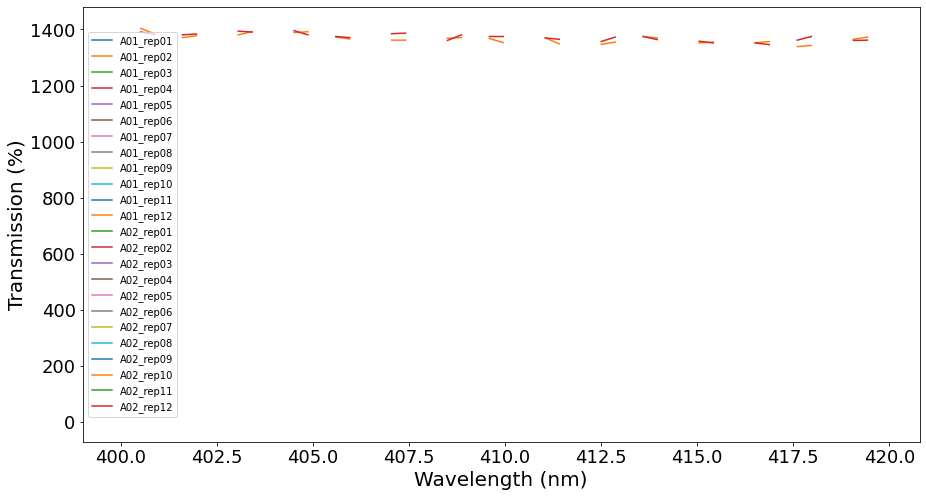

In [6]:
import lib.data_process

meta_df = csv.read_metadata(setup)

dp = lib.data_process.DataProcessor()
dp.apply_interpolate = False
dp.apply_normalise = False
dp.apply_trim = False
dp.apply_smooth = False
dp.wavelength_trim_min = 540
dp.wavelength_trim_max = 730

# meta_df = csv.select_from_metadata('element', 'A01', meta_df)

merged_df, title = csv.merge_dataframes(setup, meta_df)
df = dp.process_dataframe(merged_df)
print(title)
df

lib.data_process.plot(df)

In [55]:

import string
import json
chems = ['MUA',
'DDT',
'NBA',
'MPA',
'PET',
'MBA',
'DTP',
'PFDT',
'MPBA',
'FMT',
'MHOH',
'OT',
'AMP',
'NTP',
'GLU',
'blank']

chem_offset = 3
x_pos_offset = 1.5 #mm
y_pos_offset = 1.5 #mm
rows = 5
cols = 16
row_list = list(string.ascii_uppercase[:rows])
col_list = range(1, cols+1)
surface_map_dict = {}
layout_map_dict = {}

for row in row_list:
    for col in col_list:
        surface_map_dict[F"{row}{col:02d}"] = [chems[col-1], ""]
        layout_map_dict[F"{row}{col:02d}"] = [x_pos_offset*col, y_pos_offset*row_list.index(row)]
    chems = chems[chem_offset:] + chems[:chem_offset]

# json.dumps(surface_map_dict)
json.dumps(layout_map_dict)


'{"A01": [1.5, 0.0], "A02": [3.0, 0.0], "A03": [4.5, 0.0], "A04": [6.0, 0.0], "A05": [7.5, 0.0], "A06": [9.0, 0.0], "A07": [10.5, 0.0], "A08": [12.0, 0.0], "A09": [13.5, 0.0], "A10": [15.0, 0.0], "A11": [16.5, 0.0], "A12": [18.0, 0.0], "A13": [19.5, 0.0], "A14": [21.0, 0.0], "A15": [22.5, 0.0], "A16": [24.0, 0.0], "B01": [1.5, 1.5], "B02": [3.0, 1.5], "B03": [4.5, 1.5], "B04": [6.0, 1.5], "B05": [7.5, 1.5], "B06": [9.0, 1.5], "B07": [10.5, 1.5], "B08": [12.0, 1.5], "B09": [13.5, 1.5], "B10": [15.0, 1.5], "B11": [16.5, 1.5], "B12": [18.0, 1.5], "B13": [19.5, 1.5], "B14": [21.0, 1.5], "B15": [22.5, 1.5], "B16": [24.0, 1.5], "C01": [1.5, 3.0], "C02": [3.0, 3.0], "C03": [4.5, 3.0], "C04": [6.0, 3.0], "C05": [7.5, 3.0], "C06": [9.0, 3.0], "C07": [10.5, 3.0], "C08": [12.0, 3.0], "C09": [13.5, 3.0], "C10": [15.0, 3.0], "C11": [16.5, 3.0], "C12": [18.0, 3.0], "C13": [19.5, 3.0], "C14": [21.0, 3.0], "C15": [22.5, 3.0], "C16": [24.0, 3.0], "D01": [1.5, 4.5], "D02": [3.0, 4.5], "D03": [4.5, 4.5],

In [15]:
17 % 16

1